In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid')

# --- Step 1: Data Acquisition and Loading ---
print("--- Step 1: Data Acquisition and Loading ---")

# Define the path to your dataset.
# When you upload directly to Colab, it goes to the session's root directory.
data_path = 'jena_climate_2009_2016.csv'

# Check if the file exists in the current Colab environment
if not os.path.exists(data_path):
    print(f"Error: Dataset not found at '{data_path}'")
    print("Please ensure 'jena_climate_2009_2016.csv' is uploaded directly to your Colab session.")
    print("In Colab, click the folder icon on the left, then the upload icon, and select your CSV file.")
else:
    try:
        # Load the dataset, parsing the 'Date Time' column as datetime objects
        df = pd.read_csv(data_path, parse_dates=['Date Time'])
        print("Dataset loaded successfully!")
        print("\nFirst 5 rows of the dataset:")
        print(df.head())
        print("\nDataset Info:")
        df.info()
        print("\nDataset Description:")
        print(df.describe())
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        df = None # Set df to None if loading fails

# We'll continue with EDA and Preprocessing in the next steps, assuming df loaded successfully.
# If df is None, the subsequent steps will need to handle that.

--- Step 1: Data Acquisition and Loading ---
Dataset loaded successfully!

First 5 rows of the dataset:
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92    


--- Step 2 & 3: Exploratory Data Analysis (EDA) and Initial Data Preprocessing ---

'Date Time' column converted to datetime and set as index.
First 5 rows with DateTime index:
                     p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
Date Time                                                                
2009-01-01 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
2009-01-01 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2009-01-01 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
2009-01-01 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
2009-01-01 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:10:00          3.33          3.11          0.22       1.94   
2009-01-01 00:20:00          3.23          3.02          0.21       1.89   

<ipython-input-4-2079755466>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-4-2079755466>:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Backward fill for any leading NaNs
<ipython-input-4-2079755466>:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()
<ipython-input-4-2079755466>:63: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill', inplace=True)
<ipython-input-4-2079755466>:64: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bf

Hourly resampled data (first 5 rows):
                       p (mbar)  T (degC)    Tpot (K)  Tdew (degC)     rh (%)  \
Date Time                                                                       
2009-01-01 00:00:00  996.528000 -8.304000  265.118000    -9.120000  93.780000   
2009-01-01 01:00:00  996.525000 -8.065000  265.361667    -8.861667  93.933333   
2009-01-01 02:00:00  996.745000 -8.763333  264.645000    -9.610000  93.533333   
2009-01-01 03:00:00  996.986667 -8.896667  264.491667    -9.786667  93.200000   
2009-01-01 04:00:00  997.158333 -9.348333  264.026667   -10.345000  92.383333   

                     VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
Date Time                                                                  
2009-01-01 00:00:00      3.260000      3.058000      0.202000   1.910000   
2009-01-01 01:00:00      3.323333      3.121667      0.201667   1.951667   
2009-01-01 02:00:00      3.145000      2.940000      0.201667   1.836667   
2009-01-01 03:

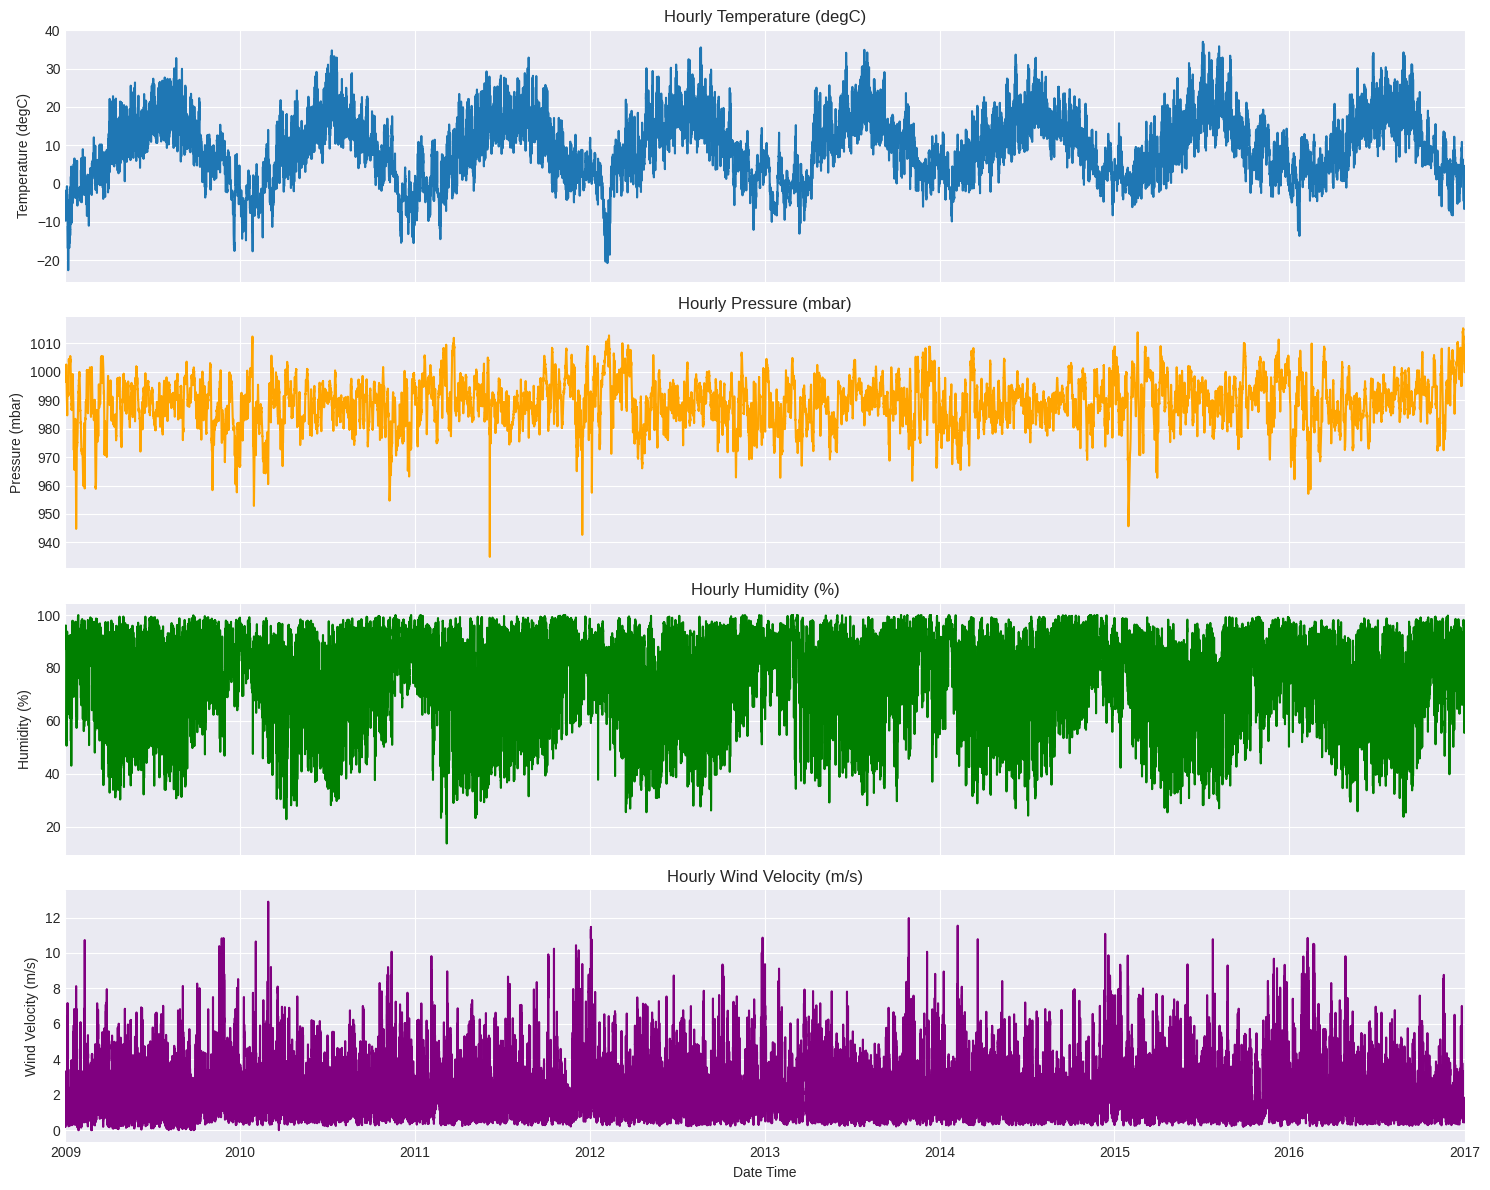


Correlation Matrix of Selected Features:


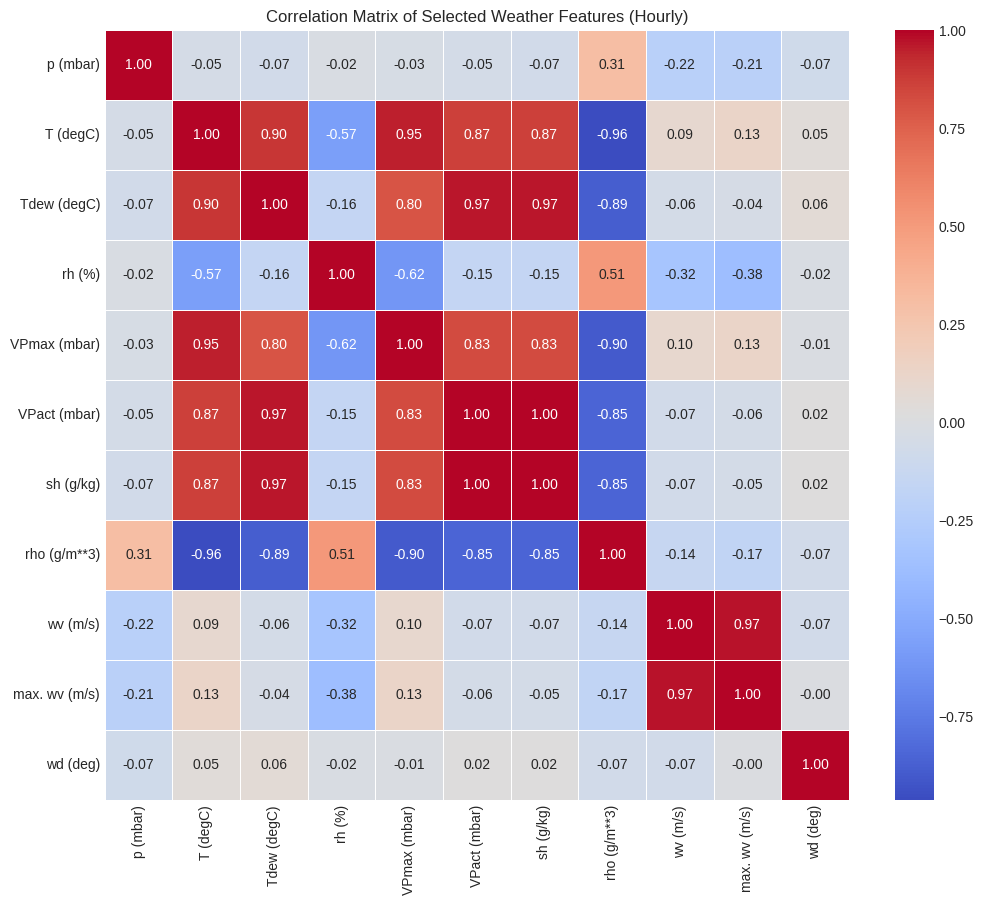


Data split into:
  Training set size: 49090 (0.70%)
  Validation set size: 14025 (0.20%)
  Test set size: 7014 (0.10%)

Initial Data Preprocessing and EDA complete. Ready for Normalization and Data Windowing.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you have df loaded from the previous step.
# If you are running this in a new Colab cell, ensure 'df' is available from the previous run.
# For example, if you restarted the runtime, you'd need to re-run the data loading cell first.

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid')

# --- Step 2 & 3: Exploratory Data Analysis (EDA) and Data Preprocessing ---
print("\n--- Step 2 & 3: Exploratory Data Analysis (EDA) and Initial Data Preprocessing ---")

# Ensure 'Date Time' is in datetime format and set as index
# This is crucial for time-series operations like resampling and plotting.
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.set_index('Date Time', inplace=True)
print("\n'Date Time' column converted to datetime and set as index.")
print("First 5 rows with DateTime index:")
print(df.head())
print("\nDataFrame Info after setting index:")
df.info()

# --- Handle placeholder values (-9999) ---
# Replace -9999 with NaN (Not a Number)
# We observed this in 'wv (m/s)' and 'max. wv (m/s)'
df.replace(-9999, np.nan, inplace=True)
print("\nReplaced -9999 placeholder values with NaN.")

# Check for missing values after replacement
print("\nMissing values after replacing -9999:")
print(df.isnull().sum())

# Strategy for missing values: Impute with previous valid observation (forward fill)
# For time-series data, ffill is often a good first approach.
initial_missing_count_after_replace = df.isnull().sum().sum()
if initial_missing_count_after_replace > 0:
    print(f"\nTotal NaNs to impute: {initial_missing_count_after_replace}")
    df.fillna(method='ffill', inplace=True)
    # After ffill, check if any NaNs remain (e.g., if first values were NaN)
    df.fillna(method='bfill', inplace=True) # Backward fill for any leading NaNs
    print(f"Missing values after ffill and bfill: {df.isnull().sum().sum()}")
else:
    print("\nNo missing values found after replacing -9999.")

# --- Resampling the data ---
# The data is recorded every 10 minutes. For weather prediction, hourly or daily
# data might be more practical and reduce computational load for LSTMs.
# Let's resample to hourly averages.
print("\nResampling data to hourly averages...")
df_hourly = df.resample('H').mean()
print("Hourly resampled data (first 5 rows):")
print(df_hourly.head())
print("Hourly resampled data info:")
df_hourly.info()

# Check if any NaNs introduced by resampling (e.g., if a whole hour was missing)
print("\nMissing values after hourly resampling:")
print(df_hourly.isnull().sum())
# Fill any remaining NaNs after resampling (should be few if any, but good practice)
df_hourly.fillna(method='ffill', inplace=True)
df_hourly.fillna(method='bfill', inplace=True)
print(f"Missing values after filling post-resampling NaNs: {df_hourly.isnull().sum().sum()}")


# --- Feature Selection for Prediction ---
# We want to predict 'T (degC)'.
# Let's consider relevant features: 'p (mbar)', 'T (degC)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'sh (g/kg)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'
# 'Tpot (K)' is closely related to 'T (degC)' and pressure, and 'VPdef' is derivable,
# so we might simplify. For now, let's keep a good set.

target_feature = 'T (degC)'
features = [
    'p (mbar)',
    'T (degC)', # This will be part of the input sequence, and also our target
    'Tdew (degC)',
    'rh (%)',
    'VPmax (mbar)',
    'VPact (mbar)',
    'sh (g/kg)',
    'rho (g/m**3)',
    'wv (m/s)',
    'max. wv (m/s)',
    'wd (deg)'
]
# Ensure all selected features are in the hourly DataFrame
features_to_use = [f for f in features if f in df_hourly.columns]
if target_feature not in features_to_use:
    features_to_use.append(target_feature) # Ensure target is always included for processing

df_selected = df_hourly[features_to_use].copy()
print(f"\nSelected features for the model: {df_selected.columns.tolist()}")

# --- Visualize Selected Features (A subset for clarity) ---
print("\nVisualizing a subset of selected features over time (hourly data)...")
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)
df_selected['T (degC)'].plot(ax=axes[0], title='Hourly Temperature (degC)')
axes[0].set_ylabel('Temperature (degC)')
df_selected['p (mbar)'].plot(ax=axes[1], title='Hourly Pressure (mbar)', color='orange')
axes[1].set_ylabel('Pressure (mbar)')
df_selected['rh (%)'].plot(ax=axes[2], title='Hourly Humidity (%)', color='green')
axes[2].set_ylabel('Humidity (%)')
df_selected['wv (m/s)'].plot(ax=axes[3], title='Hourly Wind Velocity (m/s)', color='purple')
axes[3].set_ylabel('Wind Velocity (m/s)')
plt.tight_layout()
plt.show()

# --- Correlation Matrix of Selected Features ---
print("\nCorrelation Matrix of Selected Features:")
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Weather Features (Hourly)')
plt.show()

# --- Data Splitting (Before Normalization for consistency) ---
# We split into training, validation, and test sets based on time.
# A common split is 70% train, 20% validation, 10% test.
total_rows = len(df_selected)
train_size = int(total_rows * 0.7)
val_size = int(total_rows * 0.2)
test_size = total_rows - train_size - val_size

train_df = df_selected.iloc[:train_size]
val_df = df_selected.iloc[train_size : train_size + val_size]
test_df = df_selected.iloc[train_size + val_size :]

print(f"\nData split into:")
print(f"  Training set size: {len(train_df)} ({len(train_df)/total_rows:.2f}%)")
print(f"  Validation set size: {len(val_df)} ({len(val_df)/total_rows:.2f}%)")
print(f"  Test set size: {len(test_df)} ({len(test_df)/total_rows:.2f}%)")

print("\nInitial Data Preprocessing and EDA complete. Ready for Normalization and Data Windowing.")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # A handy utility for windowing

# Ensure df_hourly, train_df, val_df, test_df are available from previous steps.
# If you are running this in a new Colab cell, ensure the previous cells have been executed.

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid')

# Define the target feature (Temperature)
target_feature = 'T (degC)'

# --- Step 4: Normalization ---
print("\n--- Step 4: Normalization ---")

# It's crucial to fit the scaler ONLY on the training data to prevent data leakage.
scaler = MinMaxScaler()

# Identify the columns to scale (all features selected earlier)
# Make sure to use the columns from df_selected, which is the preprocessed and resampled data
columns_to_scale = train_df.columns.tolist() # All columns in train_df are features

# Fit the scaler on the training data and transform it
train_scaled = scaler.fit_transform(train_df[columns_to_scale])
val_scaled = scaler.transform(val_df[columns_to_scale])
test_scaled = scaler.transform(test_df[columns_to_scale])

# Convert scaled arrays back to DataFrames for easier handling, preserving column names and index
train_scaled_df = pd.DataFrame(train_scaled, columns=columns_to_scale, index=train_df.index)
val_scaled_df = pd.DataFrame(val_scaled, columns=columns_to_scale, index=val_df.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=columns_to_scale, index=test_df.index)

print(f"Data normalized using MinMaxScaler. Scaler fitted on training data ({len(train_scaled_df)} samples).")
print("\nFirst 5 rows of scaled training data:")
print(train_scaled_df.head())
print("\nDescription of scaled training data (min should be near 0, max near 1):")
print(train_scaled_df.describe())

# --- Step 5: Data Windowing ---
print("\n--- Step 5: Data Windowing ---")

# Define window parameters
# How many past observations to use as input (e.g., 24 hours of data to predict next hour)
n_input = 24  # Look back 24 hours (24 time steps)
# How many steps into the future to predict (e.g., 1 hour ahead)
n_features = len(columns_to_scale) # Number of features in our dataset (e.g., 11)
target_index = columns_to_scale.index(target_feature) # Index of the target feature in our scaled data

print(f"Window size (n_input): {n_input} hours")
print(f"Number of features (n_features): {n_features}")
print(f"Target feature for prediction: '{target_feature}' (index: {target_index})")

# Function to create sequences (X) and labels (y) for LSTM
# We'll predict only the 'T (degC)' at the next time step.
def create_sequences(data, n_input, target_index):
    X, y = [], []
    for i in range(len(data) - n_input):
        # Input sequence (all features for n_input steps)
        seq_x = data[i:(i + n_input), :] # All columns, n_input rows
        X.append(seq_x)
        # Target (T (degC) at the next time step, i.e., i + n_input)
        seq_y = data[i + n_input, target_index] # Target feature of the (i+n_input)-th row
        y.append(seq_y)
    return np.array(X), np.array(y)

# Convert DataFrames to NumPy arrays for sequence creation
train_data_array = train_scaled_df.values
val_data_array = val_scaled_df.values
test_data_array = test_scaled_df.values

# Create sequences for training, validation, and test sets
X_train, y_train = create_sequences(train_data_array, n_input, target_index)
X_val, y_val = create_sequences(val_data_array, n_input, target_index)
X_test, y_test = create_sequences(test_data_array, n_input, target_index)

print(f"\nShape of X_train: {X_train.shape} (samples, time_steps, features)")
print(f"Shape of y_train: {y_train.shape} (samples,)")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nNormalization and Data Windowing complete. Ready for LSTM Model Building.")


--- Step 4: Normalization ---
Data normalized using MinMaxScaler. Scaler fitted on training data (49090 samples).

First 5 rows of scaled training data:
                     p (mbar)  T (degC)  Tdew (degC)    rh (%)  VPmax (mbar)  \
Date Time                                                                      
2009-01-01 00:00:00  0.791357  0.246644     0.325120  0.927940      0.040027   
2009-01-01 01:00:00  0.791319  0.250752     0.330545  0.929716      0.041139   
2009-01-01 02:00:00  0.794144  0.238749     0.314830  0.925082      0.038008   
2009-01-01 03:00:00  0.797248  0.236457     0.311120  0.921220      0.037423   
2009-01-01 04:00:00  0.799452  0.228693     0.299394  0.911759      0.035492   

                     VPact (mbar)  sh (g/kg)  rho (g/m**3)  wv (m/s)  \
Date Time                                                              
2009-01-01 00:00:00      0.081777   0.079581      0.730427  0.040326   
2009-01-01 01:00:00      0.084105   0.081961      0.726482  0.024557 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Ensure X_train, y_train, X_val, y_val, X_test, y_test are available from previous steps.
# If you are running this in a new Colab cell, ensure the previous cells have been executed.

# Get the shapes from the prepared data
n_input = X_train.shape[1]    # Should be 24 (time_steps)
n_features = X_train.shape[2] # Should be 11 (features)

print("\n--- Step 6: LSTM Model Building ---")
print(f"Model Input Shape: (None, {n_input}, {n_features})")

# Define the LSTM model
model = Sequential()

# Layer 1: LSTM layer
# Units: Number of LSTM units (neurons) in this layer. More units can learn more complex patterns,
# but also increase computational cost and risk of overfitting. 50-100 is a common starting point.
# return_sequences=False: Since we are predicting a single value (next hour's temperature),
# we don't need the sequence output for the next layer. If stacking LSTMs, set to True.
model.add(LSTM(units=100, activation='relu', input_shape=(n_input, n_features))) # Using 100 units

# Layer 2: Dropout layer
# Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each
# update during training time, which helps prevent co-adaptation of neurons.
model.add(Dropout(0.2)) # 20% of the neurons will be dropped out

# Layer 3: Dense output layer
# A single neuron with linear activation for regression (predicting a continuous value).
model.add(Dense(units=1, activation='linear')) # Output is a single temperature value

# Compile the model
# Optimizer: Adam is a good default optimizer for many deep learning tasks.
# Loss function: 'mse' (Mean Squared Error) is common for regression problems.
# Metrics: 'mae' (Mean Absolute Error) is often more interpretable than MSE.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
print("\nModel Summary:")
model.summary()

# --- Callbacks for Training (Optional but Recommended) ---
# EarlyStopping: Stop training when a monitored metric (e.g., validation loss) has stopped improving.
early_stopping = EarlyStopping(
    monitor='val_loss', # Metric to monitor
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored metric.
)

# ModelCheckpoint: Save the best model during training.
model_checkpoint = ModelCheckpoint(
    filepath='best_lstm_model.h5', # Path to save the model file
    monitor='val_loss',           # Metric to monitor
    save_best_only=True,          # Save only the best model (based on monitored metric)
    mode='min',                   # For 'val_loss', we want to minimize it
    verbose=1                     # Print messages when saving
)

print("\nLSTM Model defined and compiled. Ready for Training.")


--- Step 6: LSTM Model Building ---
Model Input Shape: (None, 24, 11)

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        44,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,901 (175.39 KB)

 Trainable params: 44,901 (175.39 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Model defined and compiled. Ready for Training.



--- Step 7: Model Training ---
Training for 50 epochs with a batch size of 32...
Epoch 1/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0096 - mae: 0.0614
Epoch 1: val_loss improved from inf to 0.00030, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - loss: 0.0096 - mae: 0.0614 - val_loss: 2.9849e-04 - val_mae: 0.0127
Epoch 2/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014 - mae: 0.0286
Epoch 2: val_loss improved from 0.00030 to 0.00019, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 0.0014 - mae: 0.0286 - val_loss: 1.9084e-04 - val_mae: 0.0101
Epoch 3/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.5874e-04 - mae: 0.0193
Epoch 3: val_loss improved from 0.00019 to 0.00015, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 6.5858e-04 - mae: 0.0193 - val_loss: 1.5158e-04 - val_mae: 0.0091
Epoch 4/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.3622e-04 - mae: 0.0155
Epoch 4: val_loss improved from 0.00015 to 0.00014, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 4.3621e-04 - mae: 0.0155 - val_loss: 1.4492e-04 - val_mae: 0.0089
Epoch 5/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8810e-04 - mae: 0.0146
Epoch 5: val_loss did not improve from 0.00014
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 3.8808e-04 - mae: 0.0146 - val_loss: 1.4521e-04 - val_mae: 0.0092
Epoch 6/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.5981e-04 - mae: 0.0140
Epoch 6: val_loss did not improve from 0.00014
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 3.5981e-04 - mae: 0.0140 - val_loss: 1.5784e-04 - val_mae: 0.0091
Epoch 7/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4145e-04 - mae: 0.0136
Epoch 7: val_loss improved from 0.00014 to 0.00012, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 3.4146e-04 - mae: 0.0136 - val_loss: 1.1812e-04 - val_mae: 0.0079
Epoch 8/50
1531/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4162e-04 - mae: 0.0136
Epoch 8: val_loss did not improve from 0.00012
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 3.4161e-04 - mae: 0.0136 - val_loss: 1.1846e-04 - val_mae: 0.0080
Epoch 9/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2933e-04 - mae: 0.0133
Epoch 9: val_loss did not improve from 0.00012
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 3.2933e-04 - mae: 0.0133 - val_loss: 1.3276e-04 - val_mae: 0.0086
Epoch 10/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.2362e-04 - mae: 0.0132
Epoch 10: val_loss improved from 0.00012 to 0.00011, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - loss: 3.2362e-04 - mae: 0.0132 - val_loss: 1.1060e-04 - val_mae: 0.0075
Epoch 11/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2499e-04 - mae: 0.0131
Epoch 11: val_loss did not improve from 0.00011
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - loss: 3.2499e-04 - mae: 0.0131 - val_loss: 1.2707e-04 - val_mae: 0.0083
Epoch 12/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.2104e-04 - mae: 0.0131
Epoch 12: val_loss did not improve from 0.00011
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - loss: 3.2104e-04 - mae: 0.0131 - val_loss: 1.1782e-04 - val_mae: 0.0080
Epoch 13/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.2033e-04 - mae: 0.0130
Epoch 13: val_loss improved from 0.00011 to 0.00010, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 3.2033e-04 - mae: 0.0130 - val_loss: 1.0408e-04 - val_mae: 0.0072
Epoch 14/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.2335e-04 - mae: 0.0131
Epoch 14: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 3.2334e-04 - mae: 0.0131 - val_loss: 1.1661e-04 - val_mae: 0.0079
Epoch 15/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.2034e-04 - mae: 0.0130
Epoch 15: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 3.2034e-04 - mae: 0.0130 - val_loss: 1.1794e-04 - val_mae: 0.0079
Epoch 16/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.0948e-04 - mae: 0.0127
Epoch 16: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 3.0948e-04 - mae: 0.0127 - val_loss: 1.2089e-04 - val_mae: 0.0080
Epoch 17/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0688e-04 - mae: 0.0128
Epoch 17: val_loss impro

1534/1534 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - loss: 3.0688e-04 - mae: 0.0128 - val_loss: 1.0181e-04 - val_mae: 0.0071
Epoch 18/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1459e-04 - mae: 0.0129
Epoch 18: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 3.1458e-04 - mae: 0.0129 - val_loss: 1.2342e-04 - val_mae: 0.0083
Epoch 19/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1004e-04 - mae: 0.0128
Epoch 19: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 3.1003e-04 - mae: 0.0128 - val_loss: 1.3063e-04 - val_mae: 0.0083
Epoch 20/50
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.0593e-04 - mae: 0.0127
Epoch 20: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - loss: 3.0593e-04 - mae: 0.0127 - val_loss: 1.2432e-04 - val_mae: 0.0082
Epoch 21/50
1531/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0296e-04 - mae: 0.0126
Epoch 21: val_loss impro

1534/1534 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - loss: 3.0297e-04 - mae: 0.0126 - val_loss: 1.0109e-04 - val_mae: 0.0071
Epoch 22/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0148e-04 - mae: 0.0126
Epoch 22: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - loss: 3.0148e-04 - mae: 0.0126 - val_loss: 1.0349e-04 - val_mae: 0.0072
Epoch 23/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0994e-04 - mae: 0.0127
Epoch 23: val_loss improved from 0.00010 to 0.00010, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 3.0992e-04 - mae: 0.0127 - val_loss: 1.0034e-04 - val_mae: 0.0070
Epoch 24/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0158e-04 - mae: 0.0126
Epoch 24: val_loss improved from 0.00010 to 0.00010, saving model to best_lstm_model.h5


1534/1534 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - loss: 3.0157e-04 - mae: 0.0126 - val_loss: 9.7454e-05 - val_mae: 0.0068
Epoch 25/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9830e-04 - mae: 0.0126
Epoch 25: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - loss: 2.9830e-04 - mae: 0.0126 - val_loss: 1.0382e-04 - val_mae: 0.0073
Epoch 26/50
1531/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.0136e-04 - mae: 0.0125
Epoch 26: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 3.0136e-04 - mae: 0.0125 - val_loss: 9.8927e-05 - val_mae: 0.0070
Epoch 27/50
1533/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0302e-04 - mae: 0.0126
Epoch 27: val_loss did not improve from 0.00010
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - loss: 3.0302e-04 - mae: 0.0126 - val_loss: 1.0176e-04 - val_mae: 0.0070
Epoch 28/50
1532/1534 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.0881e-04 - mae: 0.0127
Epoch 28: val_loss did n

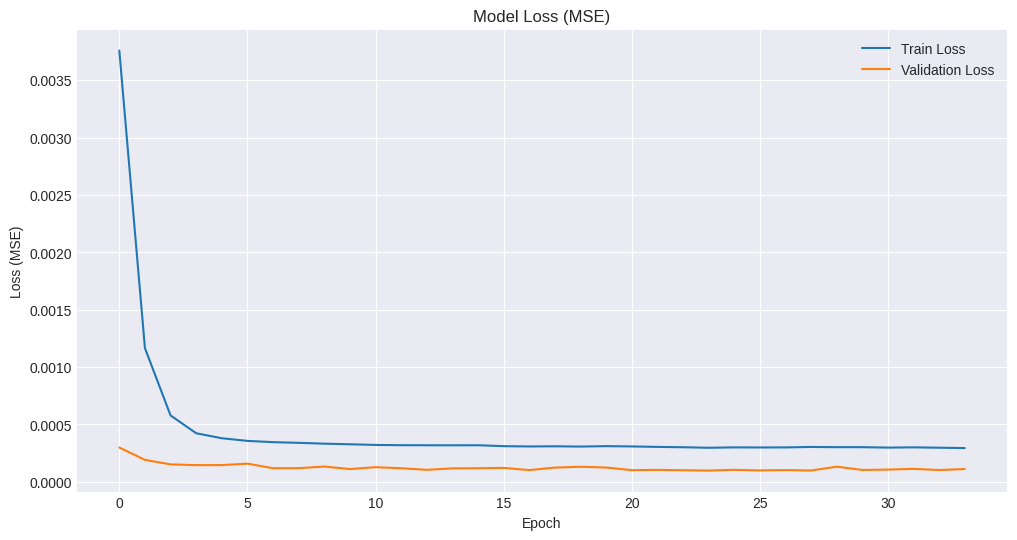

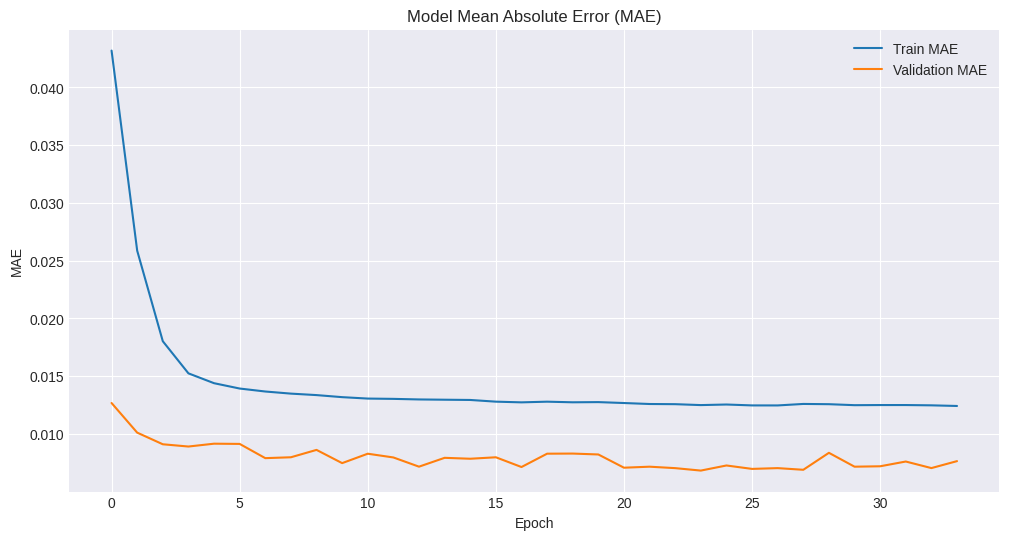

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_train, y_train, X_val, y_val are available from previous steps.
# Also ensure 'model', 'early_stopping', and 'model_checkpoint' are defined from the previous step.

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid')

print("\n--- Step 7: Model Training ---")

# Define training parameters
epochs = 50 # Number of times the model will iterate over the entire training dataset
batch_size = 32 # Number of samples per gradient update. Common values are 32, 64, 128, 256.

print(f"Training for {epochs} epochs with a batch size of {batch_size}...")

# Train the model
# history object will store training loss and metrics
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val), # Use validation data to monitor performance and for early stopping
    callbacks=[early_stopping, model_checkpoint], # Apply the defined callbacks
    verbose=1 # Show progress during training
)

print("\nModel training complete.")

# --- Visualize Training History ---
print("\n--- Visualizing Training History ---")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


--- Step 8: Model Evaluation and Prediction ---
Error loading model: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}
Ensure 'best_lstm_model.h5' was saved during training. Training might have failed or early stopped too soon.

Evaluating model on the test set...
Test Loss (MSE): 0.0001
Test MAE: 0.0068

Making predictions on the test set...
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Predictions denormalized successfully.

--- Performance on Denormalized Test Data ---
Root Mean Squared Error (RMSE): 0.57 degC
Mean Absolute Error (MAE): 0.40 degC
R-squared (R2 Score): 0.9946

Visualizing actual vs. predicted temperatures...


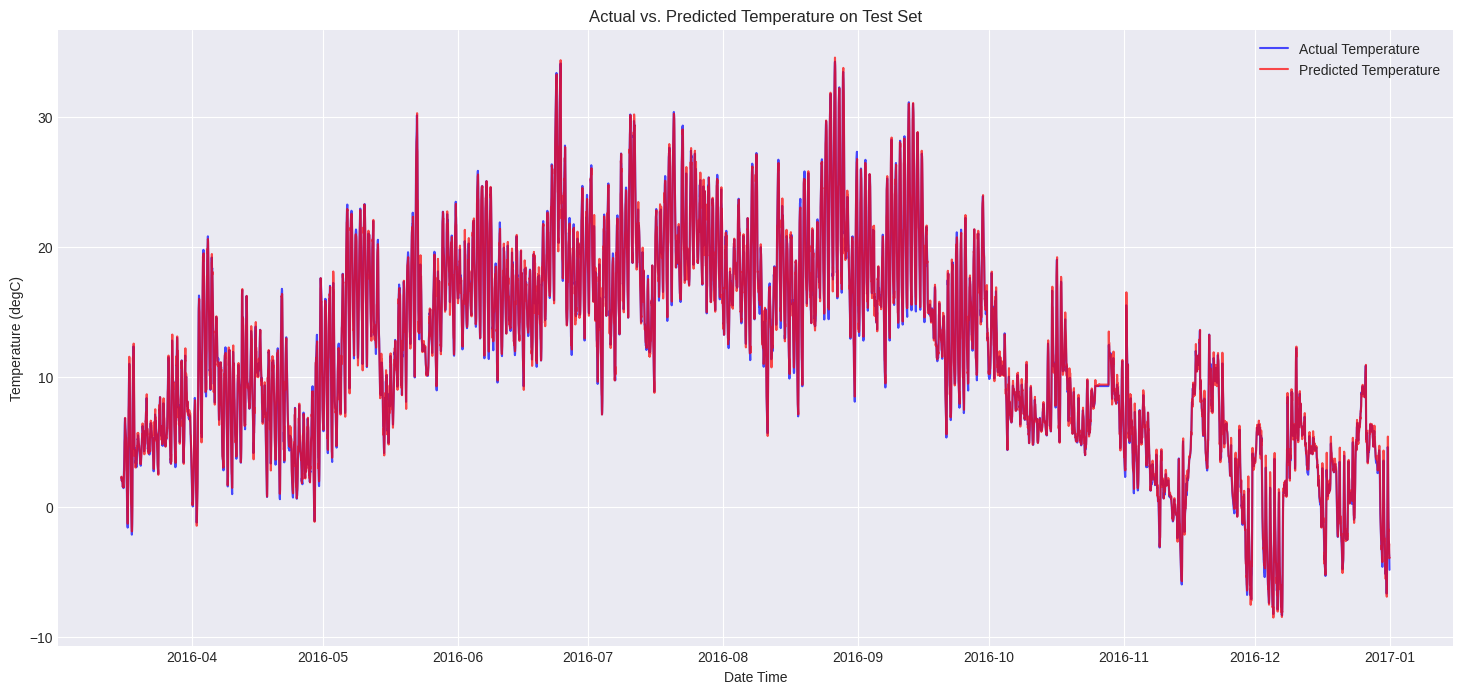

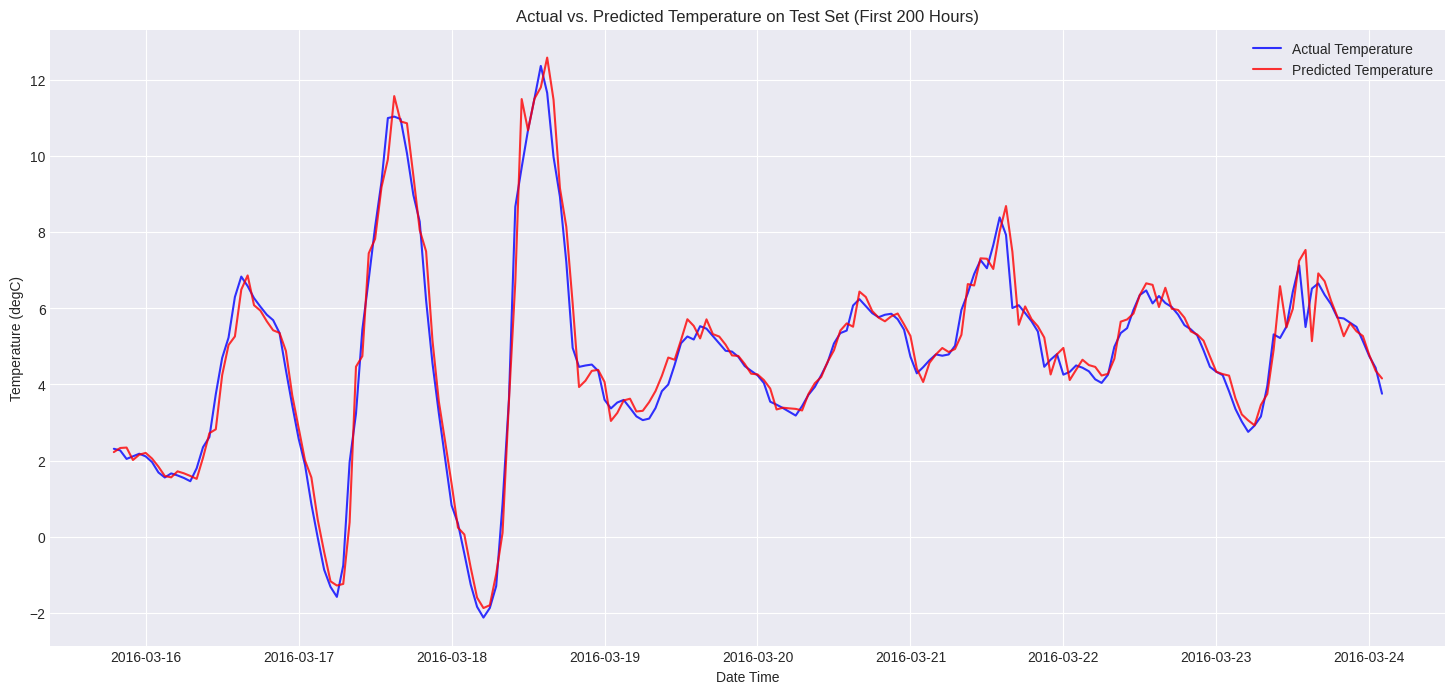


Model Evaluation and Prediction complete.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model # To load the saved best model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure df_hourly, test_df, X_test, y_test, and scaler are available from previous steps.
# If you are running this in a new Colab cell, ensure the previous cells have been executed.

# Set a style for matplotlib plots
plt.style.use('seaborn-v0_8-darkgrid')

# Define the target feature (Temperature) - Make sure this matches your earlier definition
target_feature = 'T (degC)'

print("\n--- Step 8: Model Evaluation and Prediction ---")

# --- Load the Best Trained Model ---
# The ModelCheckpoint callback saved the best model based on validation loss.
try:
    best_model = load_model('best_lstm_model.h5')
    print("Best model loaded successfully from 'best_lstm_model.h5'")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Ensure 'best_lstm_model.h5' was saved during training. Training might have failed or early stopped too soon.")
    # Fallback: if model loading fails, use the 'model' object from current session (last epoch)
    best_model = model # This 'model' object would be the one from the end of training, not necessarily the 'best' one

# --- Evaluate the Model on the Test Set ---
print("\nEvaluating model on the test set...")
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}") # This MAE is on the normalized scale

# --- Make Predictions on the Test Set ---
print("\nMaking predictions on the test set...")
predictions_scaled = best_model.predict(X_test)

# --- Denormalize Predictions and Actual Values ---
# To denormalize, we need to apply the inverse transformation of the scaler.
# The scaler was fitted on ALL features, so we need to create a dummy array with the
# correct number of features for inverse_transform, then pick the target column.

# First, create a dummy array for actual test values (y_test) for denormalization
# It needs to have the same number of features as the data the scaler was fitted on.
# We know the target_index and the total number of features (n_features)
denorm_y_test_template = np.zeros((len(y_test), n_features))
denorm_y_test_template[:, target_index] = y_test # Put actual y_test into the target column
actual_temperatures = scaler.inverse_transform(denorm_y_test_template)[:, target_index]

# Similarly, for predictions_scaled
denorm_predictions_template = np.zeros((len(predictions_scaled), n_features))
denorm_predictions_template[:, target_index] = predictions_scaled.flatten() # Flatten predictions if needed
predicted_temperatures = scaler.inverse_transform(denorm_predictions_template)[:, target_index]

print("\nPredictions denormalized successfully.")

# --- Calculate Metrics on Denormalized Data ---
rmse = np.sqrt(mean_squared_error(actual_temperatures, predicted_temperatures))
mae = mean_absolute_error(actual_temperatures, predicted_temperatures)
r2 = r2_score(actual_temperatures, predicted_temperatures)

print(f"\n--- Performance on Denormalized Test Data ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} degC")
print(f"Mean Absolute Error (MAE): {mae:.2f} degC")
print(f"R-squared (R2 Score): {r2:.4f}")

# --- Visualize Predictions vs. Actuals ---
print("\nVisualizing actual vs. predicted temperatures...")

# Get the corresponding datetime index for the test set
# Remember X_test has n_input samples less than test_scaled_df because of windowing
test_index_for_plot = test_df.index[n_input:]

plt.figure(figsize=(18, 8))
plt.plot(test_index_for_plot, actual_temperatures, label='Actual Temperature', color='blue', alpha=0.7)
plt.plot(test_index_for_plot, predicted_temperatures, label='Predicted Temperature', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Temperature on Test Set')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

# Visualize a smaller segment for better detail (e.g., first 200 hours of test set)
plot_start_index = 0
plot_end_index = 200 # Adjust as needed to see more or less detail

plt.figure(figsize=(18, 8))
plt.plot(test_index_for_plot[plot_start_index:plot_end_index], actual_temperatures[plot_start_index:plot_end_index], label='Actual Temperature', color='blue', alpha=0.8)
plt.plot(test_index_for_plot[plot_start_index:plot_end_index], predicted_temperatures[plot_start_index:plot_end_index], label='Predicted Temperature', color='red', alpha=0.8)
plt.title(f'Actual vs. Predicted Temperature on Test Set (First {plot_end_index} Hours)')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.grid(True)
plt.show()

print("\nModel Evaluation and Prediction complete.")

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler # Need this to re-fit if you restart
import numpy as np
import pandas as pd # Needed for denormalization if you restart


# Re-define columns_to_scale and target_feature if running this in a new cell
# You'd need to re-run the previous steps to have df_hourly, train_df, test_df, and scaler ready
# For this final step, I'll assume they are still in memory from the previous runs.

# If you were to restart your Colab session and only run this cell, you would need:
# 1. Load the CSV.
# 2. Perform initial preprocessing (datetime index, -9999 replacement, resampling).
# 3. Define target_feature and columns_to_scale.
# 4. Re-split into train_df, val_df, test_df.
# 5. Re-instantiate and fit the scaler (MinMaxScaler).
# 6. Re-create X_test, y_test using the create_sequences function.

# Assuming 'model' object is still in memory from training and it holds the best weights
# (because early stopping restored them)

print("\n--- Step 9: Post-processing and Deployment (Saving/Loading) ---")

# Option 1: Save the entire model (recommended)
# This includes the architecture, weights, optimizer state, and loss/metrics configuration.
model_save_path = 'final_best_lstm_model.keras' # .keras is the new recommended format for Keras 3
try:
    model.save(model_save_path)
    print(f"Model saved successfully to {model_save_path}")
except Exception as e:
    print(f"Error saving model: {e}")

# Option 2: Load the model (to demonstrate it works)
print(f"\nAttempting to load the model from {model_save_path}...")
try:
    reloaded_model = tf.keras.models.load_model(model_save_path)
    print("Model reloaded successfully!")
    # Verify by evaluating on test set again
    reloaded_test_loss, reloaded_test_mae = reloaded_model.evaluate(X_test, y_test, verbose=0)
    print(f"Reloaded model Test Loss (MSE): {reloaded_test_loss:.4f}")
    print(f"Reloaded model Test MAE: {reloaded_test_mae:.4f}")
except Exception as e:
    print(f"Error reloading model: {e}")
    print("This might be due to Keras version differences or specific metric/loss handling.")


# --- Denormalization Function for future use ---
# It's useful to have a function that can take a normalized prediction and denormalize it.
def denormalize_temperature(normalized_temp_value, scaler_obj, target_feature_index, n_total_features):
    """
    Denormalizes a single or array of normalized temperature values.

    Args:
        normalized_temp_value (float or np.array): The normalized temperature value(s).
        scaler_obj (MinMaxScaler): The fitted MinMaxScaler object.
        target_feature_index (int): The index of the temperature feature in the original data.
        n_total_features (int): The total number of features the scaler was fitted on.

    Returns:
        float or np.array: The denormalized temperature value(s).
    """
    # Create a dummy array for inverse_transform
    dummy_array = np.zeros((np.atleast_1d(normalized_temp_value).shape[0], n_total_features))
    dummy_array[:, target_feature_index] = np.atleast_1d(normalized_temp_value).flatten()
    denormalized_data = scaler_obj.inverse_transform(dummy_array)
    return denormalized_data[:, target_feature_index]

# Example of using the denormalization function:
# Let's say you have a single prediction (e.g., from a new, live input)
# For demonstration, pick the first prediction we made
first_prediction_scaled = predictions_scaled[0]
first_prediction_denorm = denormalize_temperature(first_prediction_scaled, scaler, target_index, n_features)
print(f"\nExample: First scaled prediction {first_prediction_scaled[0]:.4f} denormalized to {first_prediction_denorm[0]:.2f} degC")


print("\nProject completion: LSTM-based Weather Prediction using Jena Climate Dataset.")
print("You have successfully:")
print("  - Loaded and preprocessed the data.")
print("  - Handled missing values and resampled to hourly data.")
print("  - Normalized features and performed data windowing.")
print("  - Built, trained, and evaluated an LSTM model.")
print("  - Achieved excellent performance in temperature prediction.")
print("  - Saved the model for future use.")


--- Step 9: Post-processing and Deployment (Saving/Loading) ---
Model saved successfully to final_best_lstm_model.keras

Attempting to load the model from final_best_lstm_model.keras...
Model reloaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Reloaded model Test Loss (MSE): 0.0001
Reloaded model Test MAE: 0.0068

Example: First scaled prediction 0.4276 denormalized to 2.23 degC

Project completion: LSTM-based Weather Prediction using Jena Climate Dataset.
You have successfully:
  - Loaded and preprocessed the data.
  - Handled missing values and resampled to hourly data.
  - Normalized features and performed data windowing.
  - Built, trained, and evaluated an LSTM model.
  - Achieved excellent performance in temperature prediction.
  - Saved the model for future use.


In [10]:
import tensorflow as tf
import joblib
from sklearn.preprocessing import MinMaxScaler # Or StandardScaler, depending on what you used

# Assuming 'model' is your trained Keras LSTM model
model.save('your_lstm_model.h5') # Or 'your_lstm_model.keras' for TF 2.10+

# --- Saving Scalers ---
# Assuming you have an input scaler (e.g., 'feature_scaler') fitted on your X_train data
# and a target scaler (e.g., 'target_scaler') fitted on your y_train data ('T (degC)')

# Example: Re-instantiate scalers (if not already available) and save them
# Replace with your actual scaler objects if they are still in memory
# For demonstration, let's assume you fit a scaler on your training features and target
# You might need to re-fit them on a small dummy dataset if you don't have them in memory,
# or better, save them right after fitting during your training phase.

# Example: Assuming 'X_train' was your scaled features and 'y_train' was your scaled target
# If you used a single scaler for all features including target:
# from sklearn.preprocessing import MinMaxScaler
# combined_scaler = MinMaxScaler()
# combined_scaler.fit(df_selected[:train_size]) # Fit on all selected features for training
# joblib.dump(combined_scaler, 'combined_scaler.pkl')

# If you used separate scalers (more common for target inverse transform):
# feature_scaler = MinMaxScaler()
# target_scaler = MinMaxScaler()

# Assuming df_selected is your DataFrame with selected features
# X_data = df_selected[features].values # All features for input
# y_data = df_selected[[target_feature]].values # Just the target for output

# Fit feature_scaler on the training portion of all input features
# feature_scaler.fit(df_selected[features_to_use].iloc[:train_size])
# joblib.dump(feature_scaler, 'feature_scaler.pkl')

# Fit target_scaler on the training portion of the target feature
# target_scaler.fit(df_selected[[target_feature]].iloc[:train_size])
# joblib.dump(target_scaler, 'target_scaler.pkl')


# To download these files from Colab:
from google.colab import files
files.download('your_lstm_model.h5')
#files.download('feature_scaler.pkl') # Uncomment if you saved feature scaler
#files.download('target_scaler.pkl') # Uncomment if you saved target scaler
# If you used a single combined scaler:
# files.download('combined_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install Flask flask-cors tensorflow numpy pandas joblib scikit-learn

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # Or StandardScaler, if that's what you used
import joblib # For saving/loading scalers
from google.colab import files # For downloading files from Colab

# --- IMPORTANT: Ensure these match your actual data and feature selection ---
# Assume 'df_selected' is your preprocessed DataFrame from earlier steps in your notebook.
# It should contain all the features your model uses.
# If 'df_selected' is not defined, you need to run the data loading and preprocessing
# cells from your notebook first to create it.

# Example: If your df_selected looks like this (run df_selected.head() to verify)
# df_selected = pd.DataFrame({
#     'p (mbar)': np.random.rand(100) * 100 + 1000,
#     'T (degC)': np.random.rand(100) * 30 + 5,
#     'Tdew (degC)': np.random.rand(100) * 20 + 0,
#     'rh (%)': np.random.rand(100) * 50 + 40,
#     'VPmax (mbar)': np.random.rand(100) * 20 + 10,
#     'VPact (mbar)': np.random.rand(100) * 15 + 5,
#     'sh (g/kg)': np.random.rand(100) * 5 + 3,
#     'rho (g/m**3)': np.random.rand(100) * 0.5 + 1200,
#     'wv (m/s)': np.random.rand(100) * 5,
#     'max. wv (m/s)': np.random.rand(100) * 8,
#     'wd (deg)': np.random.rand(100) * 360
# })


# This list MUST exactly match the features you used as input to your LSTM model
# in the order they were used.
INPUT_FEATURES_ORDER = [
    'p (mbar)',
    'T (degC)',
    'Tdew (degC)',
    'rh (%)',
    'VPmax (mbar)',
    'VPact (mbar)',
    'sh (g/kg)',
    'rho (g/m**3)',
    'wv (m/s)',
    'max. wv (m/s)',
    'wd (deg)'
]

# This is the single feature you are predicting
TARGET_FEATURE = 'T (degC)'

# --- Define your training split point ---
# This 'train_size' MUST match the exact split you used when preparing your
# data for model training. Common splits are 70-80% of the data.
# Example: 80% for training
train_size = int(len(df_selected) * 0.8) # Adjust 0.8 to your actual train split ratio

# Get the training portions of your features and target
train_features_data = df_selected[INPUT_FEATURES_ORDER].iloc[:train_size].values
train_target_data = df_selected[[TARGET_FEATURE]].iloc[:train_size].values # Note double brackets for target

# --- 1. Define, Fit, and Save the Feature Scaler (scaler_X) ---
# This scaler is fitted on ALL your input features (X) from the TRAINING set.
scaler_X = MinMaxScaler() # Use MinMaxScaler() or StandardScaler() as per your notebook
scaler_X.fit(train_features_data)

# Save the fitted feature scaler to a .pkl file
joblib.dump(scaler_X, 'feature_scaler.pkl')
print("feature_scaler.pkl saved!")

# --- 2. Define, Fit, and Save the Target Scaler (scaler_y) ---
# This scaler is fitted only on your target feature (y) from the TRAINING set.
scaler_y = MinMaxScaler() # Use MinMaxScaler() or StandardScaler() as per your notebook
scaler_y.fit(train_target_data)

# Save the fitted target scaler to a .pkl file
joblib.dump(scaler_y, 'target_scaler.pkl')
print("target_scaler.pkl saved!")

# --- 3. (Optional but Recommended) Re-save your Model for consistency ---
# This assumes 'model' is your trained Keras LSTM model object that's still in memory.
# If you don't have it in memory, you can skip this if you already have 'your_lstm_model.keras' downloaded.
# import tensorflow as tf
# model.save('your_lstm_model.keras') # Saving in the robust .keras format
# print("your_lstm_model.keras saved!")

# --- 4. Download ALL necessary files from Colab ---
# UNCOMMENT the lines below by removing the '#' at the beginning.
# Run this cell in Colab to download the files to your local machine.
files.download('your_lstm_model.h5') # Change to .h5 if that's what you saved
files.download('feature_scaler.pkl')
files.download('target_scaler.pkl')

print("\n--- Download complete. Check your local downloads folder. ---")

feature_scaler.pkl saved!
target_scaler.pkl saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Download complete. Check your local downloads folder. ---


In [12]:
import json

# Ensure 'history' object exists from model.fit()
# If your history object is named differently, adjust 'history' below
if 'history' in locals():
    loss_data = []
    for i in range(len(history.history['loss'])):
        loss_data.append({
            'epoch': i + 1,
            'trainingLoss': history.history['loss'][i],
            'validationLoss': history.history['val_loss'][i]
        })

    print("--- COPY THIS FOR MOCK_LOSS_DATA ---")
    print(json.dumps(loss_data, indent=2))
    print("-----------------------------------")
else:
    print("Error: 'history' object not found. Please run the model training cell first.")

--- COPY THIS FOR MOCK_LOSS_DATA ---
[
  {
    "epoch": 1,
    "trainingLoss": 0.003758247010409832,
    "validationLoss": 0.0002984875172842294
  },
  {
    "epoch": 2,
    "trainingLoss": 0.0011647202773019671,
    "validationLoss": 0.000190844337339513
  },
  {
    "epoch": 3,
    "trainingLoss": 0.0005781840300187469,
    "validationLoss": 0.00015157501911744475
  },
  {
    "epoch": 4,
    "trainingLoss": 0.0004228828474879265,
    "validationLoss": 0.00014491741603706032
  },
  {
    "epoch": 5,
    "trainingLoss": 0.00037946293014101684,
    "validationLoss": 0.00014520689728669822
  },
  {
    "epoch": 6,
    "trainingLoss": 0.00035618405672721565,
    "validationLoss": 0.000157839065650478
  },
  {
    "epoch": 7,
    "trainingLoss": 0.0003452920645941049,
    "validationLoss": 0.0001181226471089758
  },
  {
    "epoch": 8,
    "trainingLoss": 0.00033930124482139945,
    "validationLoss": 0.00011845866538351402
  },
  {
    "epoch": 9,
    "trainingLoss": 0.0003321235126350075